### Unsupervised Machine Learning - Clustering using K-Means

K-means clustering is an unsupervised learning technique that is suitable for working with unlabelled data that lacks predefined categories or groups. The primary objective of this algorithm is to group similar data points together, with the number of groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K groups based on the features that are provided.

In [11]:
#import libraries

#machine learning libraries and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score,homogeneity_score
from IPython.display import Image

In [1]:
#import libaries

#For data analysis
import pandas as pd
import numpy as np

#for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Machine learning algorithms
#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install xgboost

In [3]:
 Data = pd.read_csv(r"C:\Users\mojoy\Downloads\Customers.csv")

Data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
Data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
print(Data.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

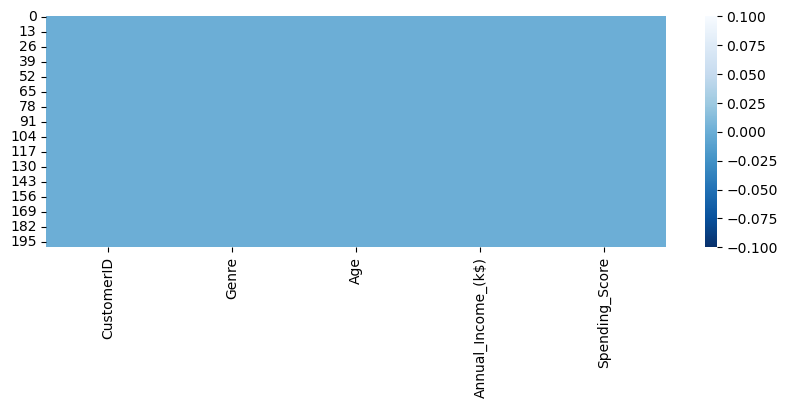

In [7]:
plt.figure(figsize= (10,3))
sns.heatmap(Data.isnull(),cbar=True,cmap ="Blues_r")

<Axes: xlabel='Age'>

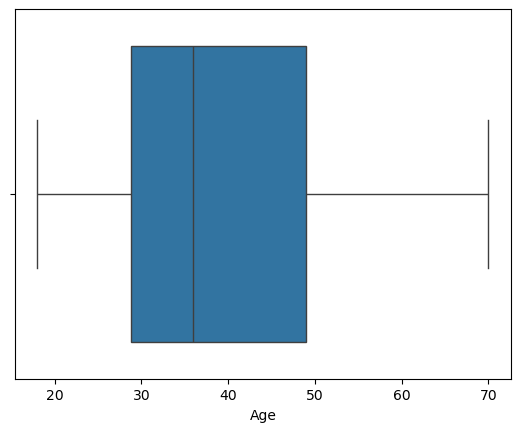

In [8]:
sns.boxplot( x= Data["Age"])

In [12]:
Data.shape

(200, 5)

### Data Cleaning and Pre-Processing

In [13]:
#Check for duplicates
print(Data.duplicated().sum())

0


In [16]:
Data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

### Exploratory Data Analysis

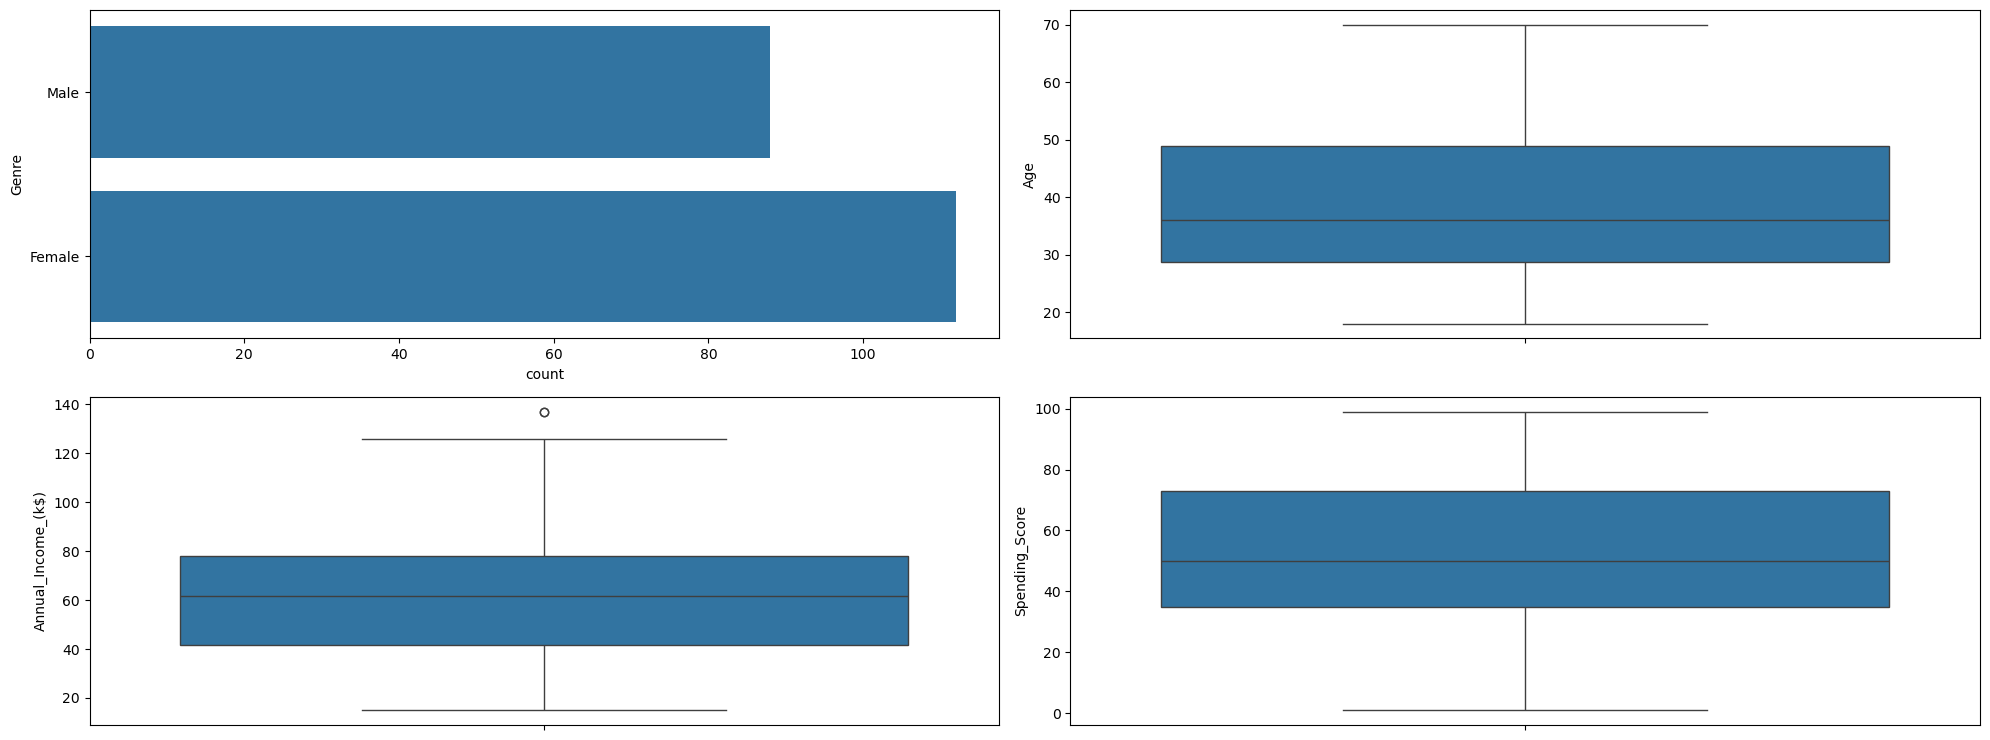

In [18]:
fig,axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(Data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(Data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(Data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(Data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

In [19]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding

encoder = LabelEncoder() #method initialization

#Looping for columns except survived
for c in Data.columns[1:]:
    if(Data[c].dtype == 'object'):
        Data[c] = encoder.fit_transform(Data[c])
    else:
        Data[c] = Data[c]

Data.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
#remove the customer ID

Data.drop('CustomerID',axis=1,inplace=True)

Data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


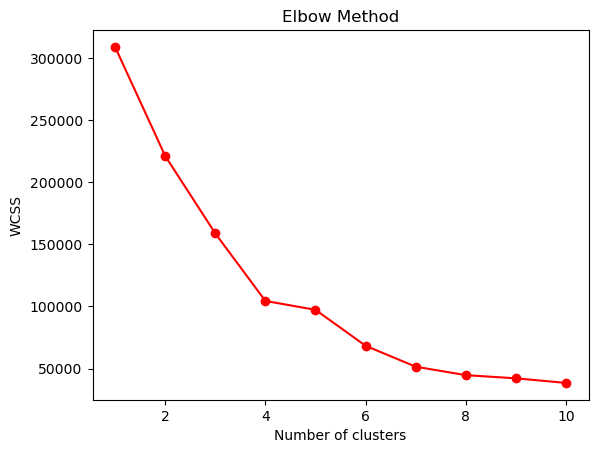

In [22]:
#determine the optimal number of clusters
#within clusters sum of squares-this is to help test the number of clusters needed.

wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(Data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss,color='red',marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In this code block, the objective is to determine the optimal number of clusters for the K-means clustering algorithm. The optimal number of clusters is import because it affects the quality of the clustering results.

The witin-cluster sum of squares(WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a slower rate.

The for loop iterates over a range of values from 1 to 10, creating a KMeans clustering model for each value of i. The 'init' parameter is set to 'k-means++', which is a method to initialize the centroids in a smart way to speed up convergence. The 'random_state' parameter is set to 42 for reproducibility. The 'fit' method is used to fit the KMeans model to the data, and the inertia(WCSS)is computed and appended to the 'wcss' list.

Finally a plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. In this case, the plot show that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond that point.

In [26]:
# Fit K-means clustering model

kmeans= KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(Data)

#Add cluster labels to data
Data['Cluster'] = kmeans.labels_

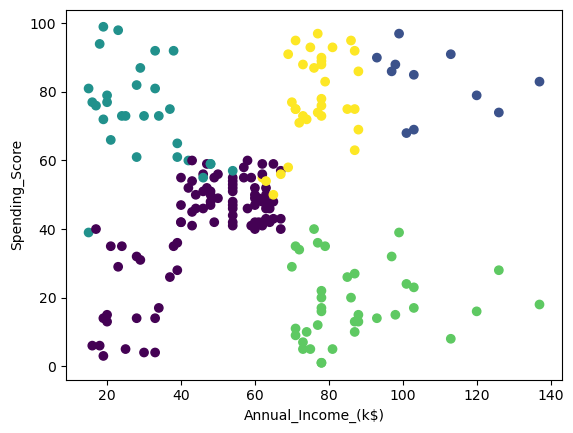

0.35961309652984097

In [29]:
#Visualize cluster results
plt.scatter(Data['Annual_Income_(k$)'],Data['Spending_Score'], c=Data['Cluster'],label= 'Centroids')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel ('Spending_Score')
plt.show()

#calculate silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(Data, kmeans.labels_)